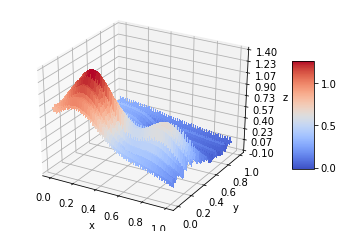

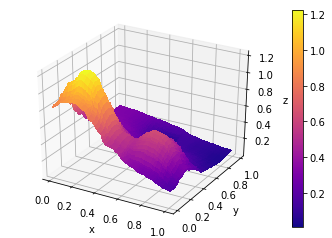

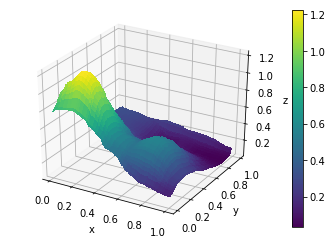

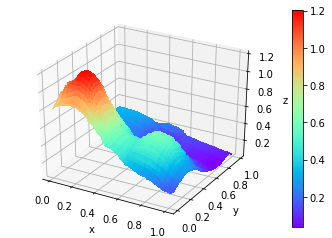

In [8]:
# Ordinary least squares:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Make data.

np.random.seed(0)
error = 0.05
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + error*np.random.randn(100,1)

xx, yy = np.meshgrid(x,y)
z = FrankeFunction(xx, yy)

poly3 = PolynomialFeatures(degree=10)
Xdes3 = poly3.fit_transform(x.reshape(-1,1), y.reshape(-1,1))

ols3 = LinearRegression()
ols3.fit(Xdes3,z)
X3plot = poly3.fit_transform(ROW.reshape(-1,1), COL.reshape(-1,1))

# Plot the surface.

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Setting up the design matrices for 3rd 4th and 5th order Polynomial:
#Xdes3rd = np.c_[np.ones((100,1)), x, y, x*x, y*x, y*y, x*x*y, x*y*y, x*x*x, y*y*y]
Xdes4th = np.c_[np.ones((100,1)), x, y, x*x, y*x, y*y, x*x*y, x*y*y, x*x*x, y*y*y, x*x*y*y, x*y*y*y, x*x*x*y, x*x*x*x, y*y*y*y]
Xdes5th = np.c_[np.ones((100,1)), x, y, x*x, y*x, y*y, x*x*y, x*y*y, x*x*x, y*y*y, x*x*y*y, x*y*y*y, x*x*x*y, x*x*x*x, y*y*y*y, x*x*x*x*y, x*x*x*y*y, x*x*y*y*y, x*y*y*y*y, x*x*x*x*x, y*y*y*y*y]

# Setting up corresponding OLSs
#ols3 = LinearRegression()
#ols3.fit(Xdes3rd,z)

ols4 = LinearRegression()
ols4.fit(Xdes4th,z)

ols5 = LinearRegression()
ols5.fit(Xdes5th,z)

# Plotting code from template
# Make data.
n_row = 100
n_col = 100

ax_row = np.random.rand(n_row)
ax_col = np.random.rand(n_col)

# If you wish to plot the data, remember to sort the axes such that the surface
# is rendered correctly

sort_inds_row = np.argsort(ax_row) # This functions returns the indices to
                                   # ax_row that makes ax_row sorted
                                   # (see the declaration of ax_row_sorted on how to use the indices)
sort_inds_col = np.argsort(ax_col)

ROW = ax_row[sort_inds_row]
COL = ax_col[sort_inds_col]

# Grid the data.
# This must be done such that surf (surface plot) understands which (x,y)- point corresponds to which z-value
# Meshgrid returns matrices where the first matrix is ax_column repeated along the rows (vertical direction),
# where the second matrix has ax_row repeated along the columns (horizontal direction) .
# Each pair (rowmat[i,j], colmat[i,j]) for all i,j constitues a coordinate in
# the plane in the rectangular domain [min(ax_row), max(ax_row)]x[min(ax_column), max(ax_column)]

#X3rdplot = np.c_[np.ones((100,1)), ROW, COL, ROW*ROW, COL*ROW, COL*COL, ROW*COL*ROW, COL*COL*ROW, ROW*ROW*ROW, COL*COL*COL]
X4thplot = np.c_[np.ones((100,1)), ROW, COL, ROW*ROW, COL*ROW, COL*COL, ROW*COL*ROW, COL*COL*ROW, ROW*ROW*ROW, COL*COL*COL, ROW*ROW*COL*COL, ROW*COL*COL*COL, ROW*ROW*ROW*COL, ROW*ROW*ROW*ROW, COL*COL*COL*COL]
X5thplot = np.c_[np.ones((100,1)), ROW, COL, ROW*ROW, COL*ROW, COL*COL, ROW*COL*ROW, COL*COL*ROW, ROW*ROW*ROW, COL*COL*COL, ROW*ROW*COL*COL, ROW*COL*COL*COL, ROW*ROW*ROW*COL, ROW*ROW*ROW*ROW, COL*COL*COL*COL, ROW*ROW*ROW*ROW*COL, ROW*ROW*ROW*COL*COL, ROW*ROW*COL*COL*COL, ROW*COL*COL*COL*COL, ROW*ROW*ROW*ROW*ROW, COL*COL*COL*COL*COL]

ROWp, COLp = np.meshgrid(ROW, COL)

# This evaluates the height associated for each pair of coordinate made from np.meshgrid
Zpredict3 = ols3.predict(X3plot)
Zpredict4 = ols4.predict(X4thplot)
Zpredict5 = ols5.predict(X5thplot)

"""
If you wish to make some predictons on z using some regression method and plot the result,
it is possible to do so by predicting every pair of (rowmat[i,j], colmat[i,j]).

One could think of the pair  (rowmat[i,j], colmat[i,j]) as x-and y-coordinates in the plane.
When you have your parameters, apply them to every  (rowmat[i,j], colmat[i,j]) - pair.
This could for instance be done by a double for loop, where you perform the predictions
within the innermost loop.

Every prediction can then be stored in a matrix, e.g z_pred
where z_pred[i,j] corresponds to the prediction of (rowmat[i,j], colmat[i,j]),
that can be visualized in the same manner as z in the code below.
"""

# Plot the generated surface.
fig3 = plt.figure() # Starts a new window

# specify that we are plotting in 3D
ax3 = fig3.gca(projection='3d')

surf = ax3.plot_surface(ROWp, COLp, Zpredict3, linewidth = 0, antialiased = False, cmap=cm.plasma)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("z")

# Add a color bar that shows which color each value is mapped to.
fig3.colorbar(surf)

# Plot the generated surface.
fig4 = plt.figure() # Starts a new window

# specify that we are plotting in 3D
ax4 = fig4.gca(projection='3d')

surf = ax4.plot_surface(ROWp, COLp, Zpredict4, linewidth = 0, antialiased = False, cmap=cm.viridis)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_zlabel("z")

# Add a color bar that shows which color each value is mapped to.
fig4.colorbar(surf)

# Plot the generated surface.
fig5 = plt.figure() # Starts a new window

# specify that we are plotting in 3D
ax5 = fig5.gca(projection='3d')

surf = ax5.plot_surface(ROWp, COLp, Zpredict5, linewidth = 0, antialiased = False, cmap=cm.rainbow)
ax5.set_xlabel("x")
ax5.set_ylabel("y")
ax5.set_zlabel("z")

# Add a color bar that shows which color each value is mapped to.
fig5.colorbar(surf)

# Show the plot
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

var_beta3 = np.diag(np.linalg.pinv(Xdes3rd.T.dot(Xdes3rd)))
#print(var_beta3)
noise3 = 1/96 * np.sum((z-Zpredict3)**2)
print('Sigma (for noise 3rd order):', noise3)

vart3 = var_beta3*noise3
print('Variance 3rd order:', vart3)

var_beta5 = np.diag(np.linalg.pinv(Xdes5th.T.dot(Xdes5th)))
#print(var_beta5)
sum5 = 1/94 * np.sum((z-Zpredict5)**2)
print('Sigma (for noise 5th order):', sum5)

vart5 = var_beta5*sum5
print('Variance 5th order:', vart5)

print("Mean squared error:", mean_squared_error(z,Zpredict3))
print("Mean squared error:", mean_squared_error(z,Zpredict4))
print("Mean squared error:", mean_squared_error(z,Zpredict5))

print('R2 score 3rd order:', r2_score(z,Zpredict3))
print('R2 score 4th order:', r2_score(z,Zpredict4))
print('R2 score 5th order:', r2_score(z,Zpredict5))

Sigma (for noise 3rd order): 0.2506536527590217
Variance 3rd order: [0.03724132 0.7196525  0.7196525  1.77222538 1.77222538 1.77222538
 0.43925864 0.43925864 0.43925864 0.43925864]
Sigma (for noise 5th order): 0.31941681283475
Variance 5th order: [9.70182073e-02 1.04622383e+01 1.04622383e+01 1.86829719e+02
 1.86829719e+02 1.86829719e+02 6.97103014e+02 6.97103014e+02
 6.97103014e+02 6.97103014e+02 5.55385562e+02 5.55385562e+02
 5.55385562e+02 5.55385562e+02 5.55385562e+02 6.23217711e+01
 6.23217711e+01 6.23217711e+01 6.23217711e+01 6.23217710e+01
 6.23217710e+01]
Mean squared error: 0.0024062750664866086
Mean squared error: 0.00340273863108519
Mean squared error: 0.0030025180406466497
R2 score 3rd order: 0.937463328213033
R2 score 4th order: 0.9137821516640194
R2 score 5th order: 0.9307570632417503
